In [44]:
from tesserocr import PyTessBaseAPI, RIL, iterate_level, PT, OEM
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from threading import Thread
import time
%matplotlib inline

## File Path

In [5]:
IMAGE_PATH = "../datafiles/Page_2.jpg"
imageMAT = Image.open(IMAGE_PATH)

## Get blocks

In [50]:
def get_noise_val_Image(imagePIL, NoiseThreshold_ppage): # NoiseThreshold_ppage is b/w 0 and 1
    '''
    Params:
        imagePIL - PIL image object
        NoiseThreshold_ppage - %age noise threshold for an image range [0, 1]
        
    Returns:
        ratio of dark pixels and total pixels
        boolean page acceptance result based on noise ratio
        binary image with 0 representing noise pixels    
    '''
    
    BinaryThreshold = 195          #will come from config file
    
    
    # matcopy = imagePIL.copy()
    grayPIL = imagePIL.convert('L')
    imageNUMPY = np.array(grayPIL, dtype='uint8')
    # print(imageNUMPY.shape)
    
    Tessstart = time.time()
    
    with PyTessBaseAPI(path = "C:\\Tesseract\\Tesseract-OCR-v3\\tessdata") as api:
        api.SetImage(imagePIL)
        api.Recognize()
        ri = api.GetIterator()
        level = RIL.TEXTLINE
        for r in iterate_level(ri, level):
            x1, y1, x2, y2 = r.BoundingBox(level)
            # print(y1, y2, x1, x2)
            imageNUMPY[y1:y2, x1:x2] = 255
            
    #bin_ = rgb2gray(imageNUMPY)
    bin_ = np.zeros(imageNUMPY.shape)
    
    bin_ = np.where(imageNUMPY > BinaryThreshold, 1, 0)
    
    pixels_num = bin_.shape[0]*bin_.shape[1]
    ratio = (pixels_num - bin_.sum())/pixels_num
    
    return ratio, ratio > NoiseThreshold_ppage, bin_ #returns the ratio, rejection result, binary_Image

In [51]:
def get_noise_params_PDF(PDFImages, NoiseThreshold_ppage  = 0.50):
    ''' IN-PROGRESS
    PDFImages: r x c x ch x num where num is number of 
    '''
    PAGESCOUNT = len(PDFImages)
    pageNoiseFlag = [0]*PAGESCOUNT   #should be a class prop

    FORstart = time.time()
    
    for i in range(0, len(PDFImages)):
        #ITstart = time.time()
        if(get_noise_val_Image(PDFImages[i], NoiseThreshold_ppage)[1]): #rejection means: page is noisy
            pageNoiseFlag[i] = 1
        #print("Iteration-Time taken", time.time() - ITstart)
    
    print("FOR EndTime taken", time.time() - FORstart)
    
    return   sum(pageNoiseFlag)/PAGESCOUNT, pageNoiseFlag #returns the %age of pages that are noisy [0, 1]

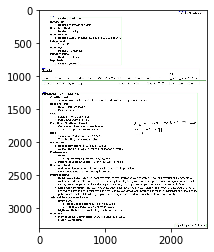

In [32]:
plt.imshow(imageMAT)

### Using the functions

In [52]:
start = time.time()
R, r, I = get_noise_val_Image(imageMAT, 0.50)
print("TIME:\t", time.time() - start)

TIME:	 3.924976348876953


0.0013134878193701723 False


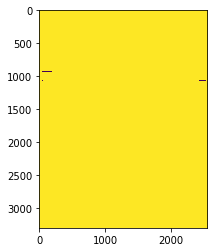

In [35]:
print(R, r)

plt.imshow(I)
plt.show()

In [24]:
np.amax(I)

0